<a href="https://colab.research.google.com/github/mimove/EDEM2022/blob/draft/Python/Notebooks/Colab_Notebooks/Fifa_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# LIBRARIES REQUIRED

!pip3 install --upgrade pip

# SEABORN
!pip3 install seaborn


# SPARK 

!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.3.0/spark-3.3.0-bin-hadoop3.tgz
!tar xf spark-3.3.0-bin-hadoop3.tgz
!pip install -q findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# CHANGING ENVIROMENT VARIABLES TO THE DIRECTORY OF JAVA AND SPARK

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.0-bin-hadoop3"

In [ ]:
# INITIALIZING SPARK

import findspark
findspark.init()

## Context
The datasets provided include the players data for the Career Mode from FIFA 15 to FIFA 20 ("fifa_players"). The data allows multiple comparison of the same players across the last 6 version of the videogame.

Some ideas of possible analysis:

Historical comparison between Messi and Ronaldo (what skill attributes changed the most during time - compared to real-life stats);

- Ideal budget to create a competitive team (at the level of top n teams in Europe) and at which point the budget does not allow to buy significantly better players for the 11-men lineup. An extra is the same comparison with the Potential attribute for the lineup instead of the Overall attribute;

- Sample analysis of top n% players (e.g. top 5% of the player) to see if some important attributes as Agility or BallControl or Strength have been popular or not acroos the FIFA versions. An example would be seeing that the top 5% players of FIFA 20 are more fast (higher Acceleration and Agility) compared to FIFA 15. The trend of attributes is also an important indication of how some attributes are necessary for players to win games (a version with more top 5% players with high BallControl stats would indicate that the game is more focused on the technique rather than the physicial aspect).

- Feel free to use the available dataset the way you prefer and do not hesitate to flag additional files (player images - datasets prior FIFA 15) that could be implemented to the existing CSV files.



In [ ]:
# MOUNTING GOOGLE DRIVE TO UPLOAD CSV FILE

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# SPARK INFO FROM https://colab.research.google.com/github/stephenbaek/bigdata/blob/master/in-class-assignments/ica02/How_to_Read_and_Represent_Data.ipynb#scrollTo=39UZ5Rp-l5GF


# BUILDING SPARK SESSION

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Hello World").getOrCreate()

# LOCATION OF CSV FILE
csvfile = '/content/drive/MyDrive/Personal/MASTER DATA/GitHub/EDEM2022/Python/Notebooks/notebooks_Ejercicios_Pedro/Exercise 3/data/fifa_players.csv'


df = spark.read.csv(csvfile, header=True, inferSchema=True)

# CHANGING THE TABLE NAME TO fifa
df.createOrReplaceTempView('fifa')



In [ ]:
results = spark.sql("select * from fifa limit 1")

results.show()

+---------+--------------------+----------+--------------------+---+-------------------+---------+---------+-----------+------------+-------+---------+---------+--------+----------------+--------------+------------------------+---------+-----------+----------+---------+---------+------------------+--------------------+-------------+------------------+-----------+-------------------+--------------------+---------------+--------------------+----+--------+-------+---------+---------+------+---------+-----------+----------+-----------+--------+--------------+--------------------+------------------+-------------------+--------------------------+-----------------------+-----------------+---------------+-----------+-----------------+------------------+------------------+---------------------+---------------------+----------------+------------------+----------------+----------------+-------------+-------------+--------------+----------------+--------------------+-----------------------+-------

In [ ]:
results = spark.sql("desc fifa")

results.show()

+--------------------+---------+-------+
|            col_name|data_type|comment|
+--------------------+---------+-------+
|           sofifa_id|      int|   null|
|          player_url|   string|   null|
|          short_name|   string|   null|
|           long_name|   string|   null|
|                 age|      int|   null|
|                 dob|timestamp|   null|
|           height_cm|      int|   null|
|           weight_kg|      int|   null|
|         nationality|   string|   null|
|                club|   string|   null|
|             overall|      int|   null|
|           potential|      int|   null|
|           value_eur|      int|   null|
|            wage_eur|      int|   null|
|    player_positions|   string|   null|
|      preferred_foot|   string|   null|
|international_rep...|      int|   null|
|           weak_foot|      int|   null|
|         skill_moves|      int|   null|
|           work_rate|   string|   null|
+--------------------+---------+-------+
only showing top

In [ ]:
results = spark.sql("select age,overall from fifa")

results.show()

+---+-------+
|age|overall|
+---+-------+
| 32|     94|
| 34|     93|
| 27|     92|
| 26|     91|
| 28|     91|
| 28|     91|
| 27|     90|
| 27|     90|
| 33|     90|
| 27|     90|
| 20|     89|
| 28|     89|
| 25|     89|
| 26|     89|
| 28|     89|
| 28|     89|
| 34|     89|
| 31|     89|
| 33|     89|
| 32|     89|
+---+-------+
only showing top 20 rows



In [ ]:
results = spark.sql("select club,avg(overall) from fifa group by club order by avg(overall) desc limit 5")
results.show()

+-----------------+-----------------+
|             club|     avg(overall)|
+-----------------+-----------------+
|FC Bayern München|81.30434782608695|
|      Real Madrid|80.12121212121212|
|         Juventus|80.06060606060606|
|          Uruguay| 78.6086956521739|
|     FC Barcelona|78.36363636363636|
+-----------------+-----------------+



In [ ]:
results = spark.sql("select nationality,overall,count(*) from fifa group by nationality,overall")
results.show()

+--------------------+-------+--------+
|         nationality|overall|count(1)|
+--------------------+-------+--------+
|             England|     79|      12|
|             England|     76|      22|
|               Italy|     74|      18|
|               Italy|     73|      24|
|             Austria|     64|      35|
|United Arab Emirates|     64|       2|
|            Barbados|     64|       1|
|            Cameroon|     63|       6|
|        South Africa|     72|       1|
|              Serbia|     71|       9|
|           Argentina|     68|      44|
|            Bulgaria|     65|       6|
|               Italy|     83|       6|
|           Argentina|     81|       6|
|            Portugal|     79|       4|
|               Spain|     77|      25|
|          Cape Verde|     77|       1|
|                Peru|     76|       1|
|             Jamaica|     64|       5|
|       United States|     76|       7|
+--------------------+-------+--------+
only showing top 20 rows



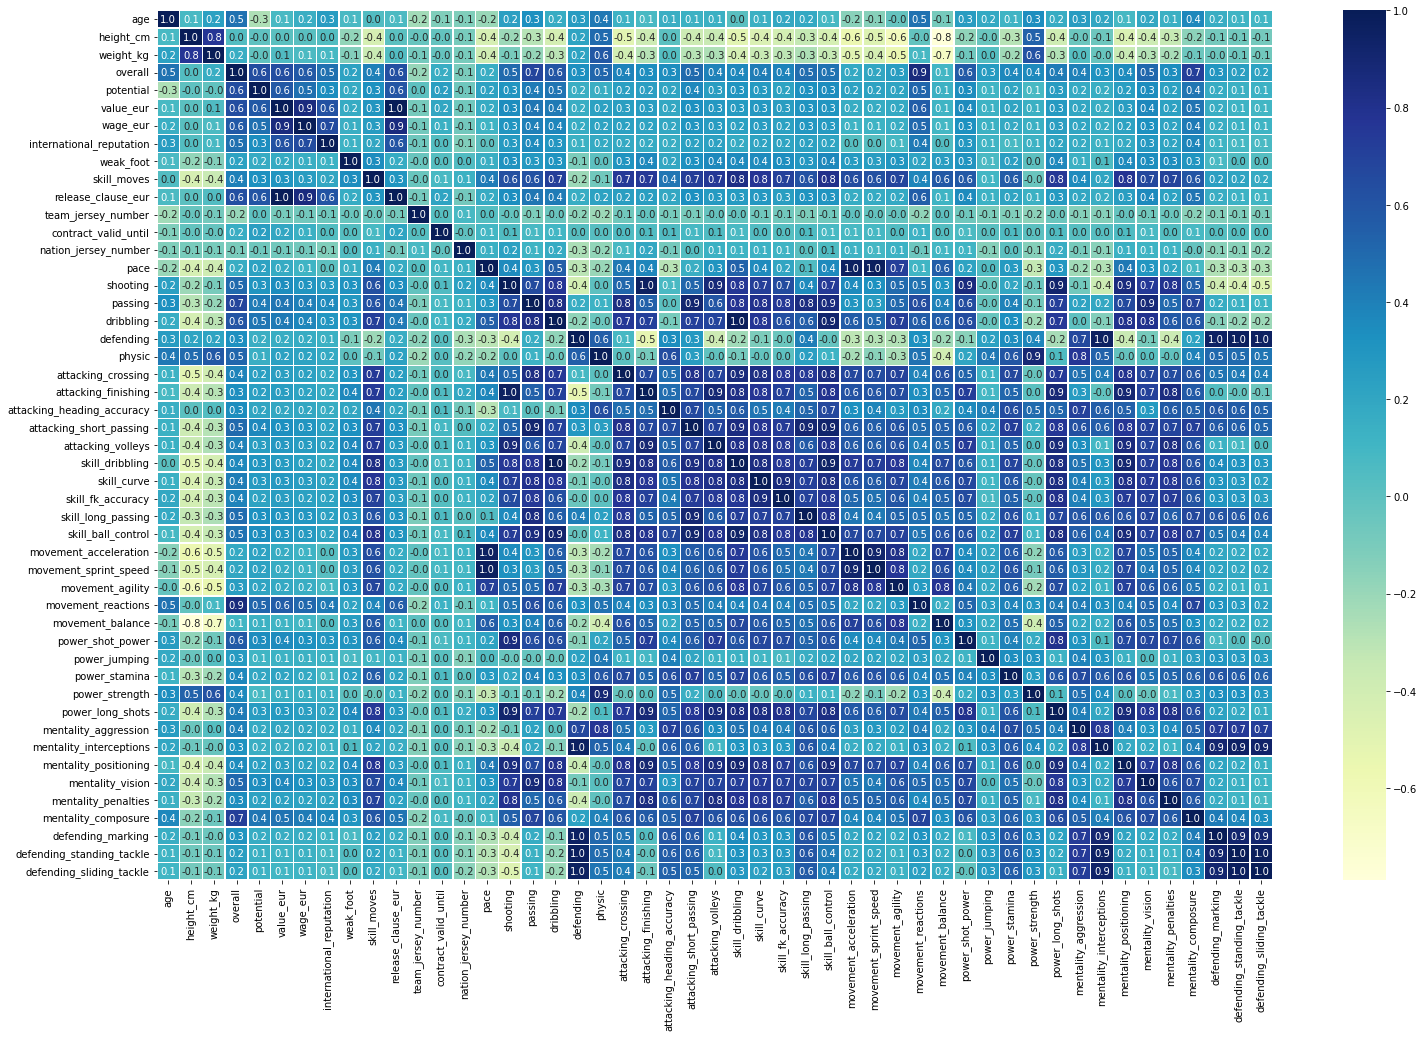

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


df =  pd.read_csv('/content/drive/MyDrive/Personal/MASTER DATA/GitHub/EDEM2022/Python/Notebooks/notebooks_Ejercicios_Pedro/Exercise 3/data/fifa_players.csv')
df2 = df[['short_name','age','height_cm','weight_kg','nationality','club', #new data frame consists major features
 'overall','potential','value_eur','wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking',
 'defending_standing_tackle',
 'defending_sliding_tackle']]
 
f,ax = plt.subplots(figsize = (25,16))
z = sns.heatmap(df2.corr(),annot = True,linewidths=.5,fmt = '.1f',ax=ax,cmap='YlGnBu')

[0.0, 1.0471975511965976, 2.0943951023931953, 3.141592653589793, 4.1887902047863905, 5.235987755982989]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


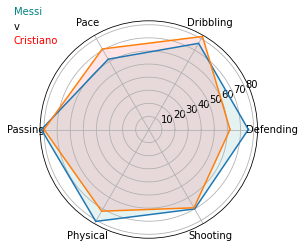

In [ ]:
import pandas as pd
from math import pi
import matplotlib.pyplot as plt


#Create a data frame from Messi and Ronaldo's 6 Ultimate Team data points from FIFA 18
Messi = {'Pace':89,'Shooting':90,'Passing':86,'Dribbling':95,'Defending':26,'Physical':61}
Ronaldo = {'Pace':90,'Shooting':93,'Passing':82,'Dribbling':90,'Defending':33,'Physical':80}

data = pd.DataFrame([Messi,Ronaldo], index = ["Messi","Ronaldo"])
Attributes =list(data)
AttNo = len(Attributes)

angles = [n / 6 * 2 * pi for n in range(6)]
angles += angles [:1]
print([n / 6 * 2 * pi for n in range(6)])

def createRadar2(player, data, player2, data2):
    Attributes = ["Defending","Dribbling","Pace","Passing","Physical","Shooting"]
    
    data += data [:1]
    data2 += data2 [:1]
    
    angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
    #angles = [0,51,102,153,204,259]
    angles += angles [:1]
    
    angles2 = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
    #angles2=[0,51,102,153,204,300]
    angles2 += angles2 [:1]
    
    ax = plt.subplot(111, polar=True)

    #Create the chart as before, but with both Ronaldo's and Messi's angles/values
    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1],Attributes)

    ax.plot(angles,data)
    ax.fill(angles, data, 'teal', alpha=0.1)

    ax.plot(angles2,data2)
    ax.fill(angles2, data2, 'red', alpha=0.1)

    #Rather than use a title, individual text points are added
    plt.figtext(0.2,0.9,player,color="teal")
    plt.figtext(0.2,0.85,"v")
    plt.figtext(0.2,0.8,player2,color="red")


createRadar2("Messi", [76,76,62,82,81,70],"Cristiano", [62,82,71,80,72,69])

In [ ]:
import sys
print(sys.version)


3.7.14 (default, Sep  8 2022, 00:06:44) 
[GCC 7.5.0]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

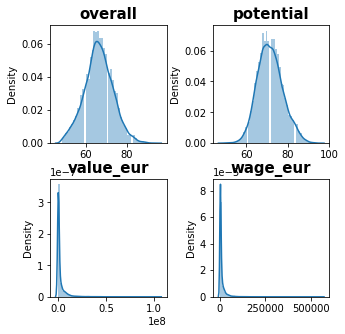

In [ ]:
cols = ['overall','potential','value_eur','wage_eur']
f,a = plt.subplots(2,2,figsize=(5,5))
f.subplots_adjust(wspace = .4, hspace = .3)
for i,col in enumerate(cols):
    sns.distplot(df[col], ax=a[i//2][i%2])
    a[i//2][i%2].set_title(col, fontsize=15, fontweight='bold')
    a[i//2][i%2].set_xlabel('')




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, '')

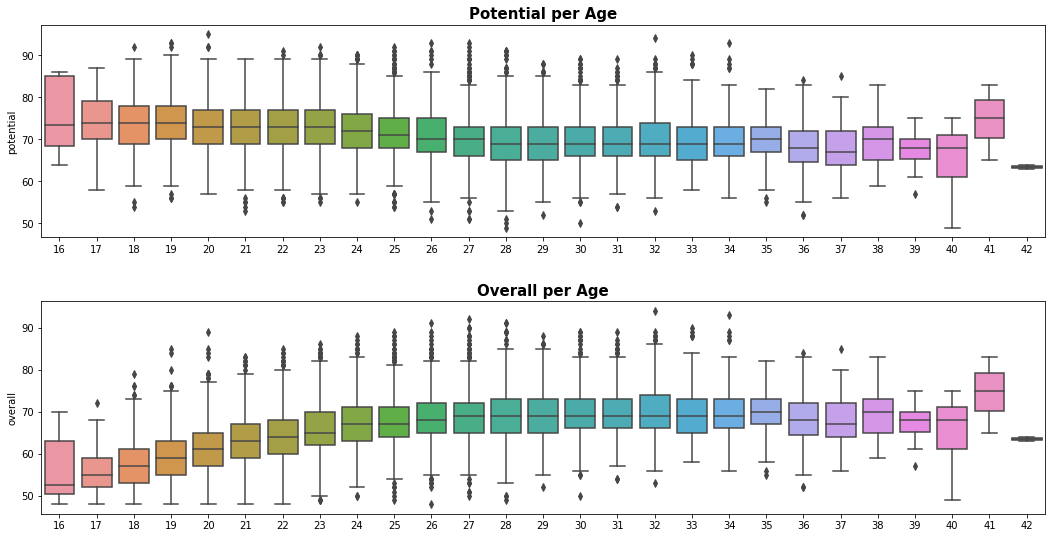

In [ ]:
f,a = plt.subplots(2,1,figsize=(18,9))
f.subplots_adjust(wspace = .4, hspace = .3)
sns.boxplot(df.age, df.potential, orient='v', ax=a[0])
a[0].set_title("Potential per Age", fontsize=15, fontweight='bold')
a[0].set_xlabel('')

sns.boxplot(df.age, df.overall, orient='v', ax=a[1])
a[1].set_title("Overall per Age", fontsize=15, fontweight='bold')
a[1].set_xlabel('')